# Análise de Dados de Filmes

Vamos analisar dois conjuntos de dados de filmes:

- Fandango
- Reviews de Websites (Rotten Tomatoes, Metacritic e IMDB)

Queremos saber se **Fandango** apresenta reviews artificialmente alteradas maiores que a média.

Para mais detalhes, você poder ler o artigo: **[Be Suspicious of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/)**

Sendo assim, vamos comparar diversas reviews de filmes.

Para isso usaremos principalmente duas bibliotecas: **pandas** e **seaborn**

Primeiramente vamos importar as bibliotecas necessárias para trabalharmos.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Fandango

E agora vamos carregar o conjunto de dados Fandango de filmes.

In [39]:
fandango = pd.read_csv('dados_filmes/fandango_scrape.csv')

Observamos as primeiras linhas com o método **head()**.

In [40]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


Como pode ver, aparentemente Fandango arredonda o **RATING** dos filmes.

Por exemplo: **3.9** para **4.0** & **4.8** para **5.0**

Para obter informações de quantas linhas estamos trabalhando e os tipos de dados, podemos usar o método **info()**.

In [41]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


Para ver propriedades estatísticas podemos usar o método **describe()**.

In [42]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Vamos agora explorar a relação entre **popularidade** de um filme e seu **rating**.

Para esta tarefa, vamos usar um **scatterplot**.

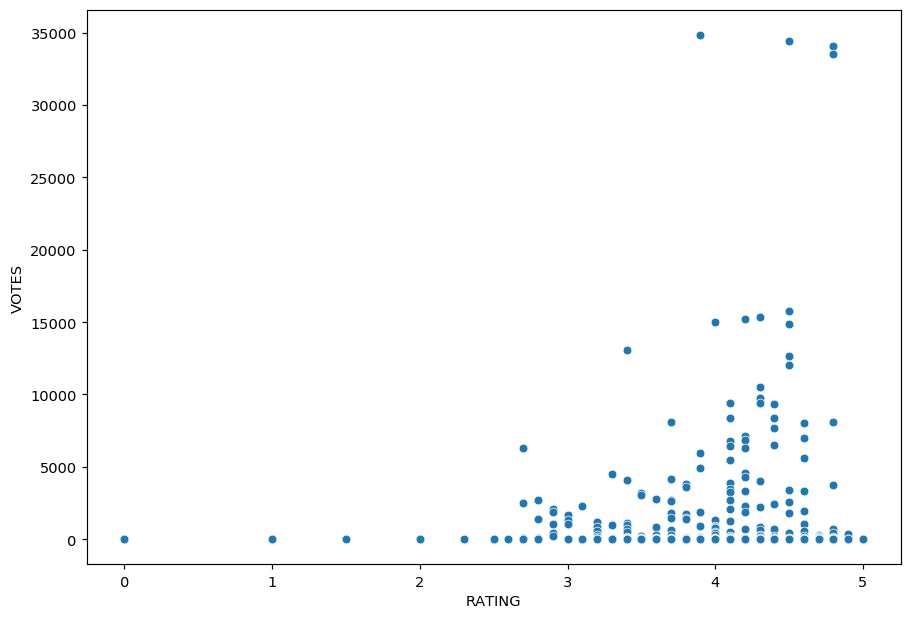

In [43]:
plt.figure(figsize=(10,7), dpi=105)
sns.scatterplot(data=fandango, y='VOTES', x='RATING');

Para calcular a correlação entre as colunas, vamos usar o método **corr()**.

In [44]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Todos os filmes possuem o seu ano entre parênteses, vamos extrair esse ano e criar uma nova coluna com ele.

In [45]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [46]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


Quantos filmes existem no conjunto de dados Fandango por ano?

In [47]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Agora visualizaremos a contagem de filmes por ano com um gráfico.

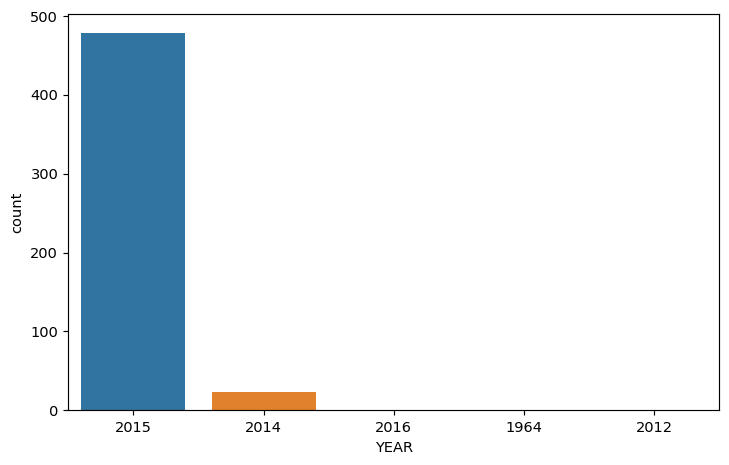

In [48]:
plt.figure(figsize=(8,5), dpi=105)
sns.countplot(data=fandango, x='YEAR');

Quais são os 10 filmes com o maior número de votos?

In [49]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Quantos filmes possuem 0 votos?

In [50]:
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

Criaremos um **DataFrame** de apenas filmes avaliados ao remover os filmes que tiveram 0 votos.

In [51]:
fan_reviewed = fandango[fandango['VOTES'] > 0]
len(fan_reviewed)

435

In [52]:
len(fandango) - len(fan_reviewed)

69

Criaremos um KDE plot que apresenta a distribuição das avaliações que são apresentadas (STARS) versus as verdadeiras avaliações dos votos (RATING).

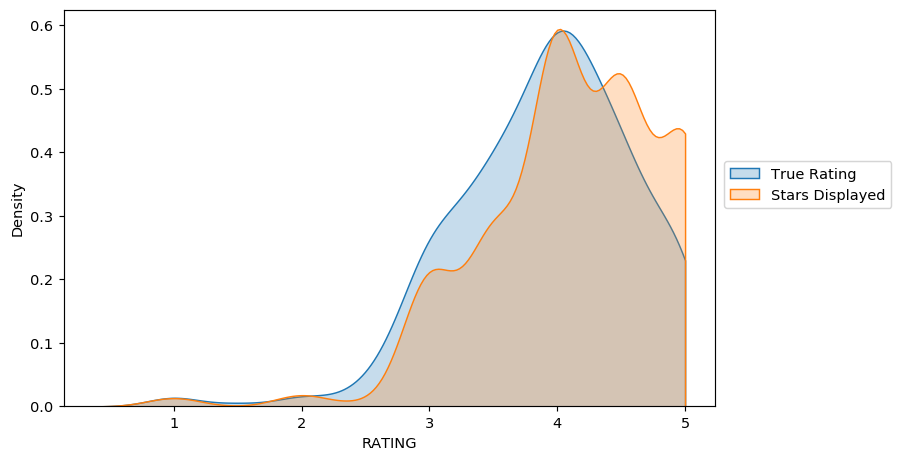

In [53]:
plt.figure(figsize=(8,5), dpi=105)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')
plt.legend(loc=(1.015,0.5));

Agora iremos quantificar essa discrepância.

Para isso, criaremos uma nova coluna com a diferença entre STARS vs RATING.

In [54]:
fan_reviewed_copy = fan_reviewed.copy()
fan_reviewed_copy['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

In [55]:
fan_reviewed_copy.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


Calculada a diferença, vamos arredondar o resultado para duas casas decimais.

In [57]:
fan_reviewed_copy['STARS_DIFF'] = fan_reviewed_copy['STARS_DIFF'].round(2)

In [59]:
fan_reviewed_copy.head(10)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014,0.2
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015,0.3
7,Minions (2015),4.0,4.0,14998,2015,0.0
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,0.5
9,Into the Woods (2014),3.5,3.4,13055,2014,0.1


Agora criaremos um **countplot** que apresentará o número de vezes que uma certa diferença ocorre.

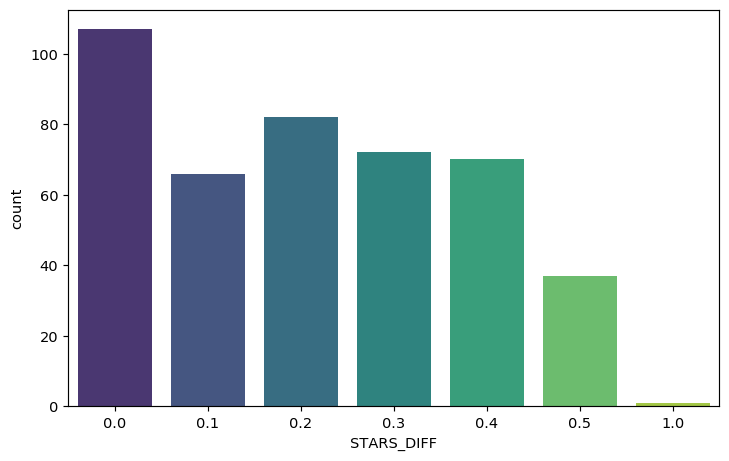

In [60]:
plt.figure(figsize=(8,5), dpi=105)
sns.countplot(data=fan_reviewed_copy, x='STARS_DIFF', palette='viridis');

Perceba um pouco mais de 100 filmes não tiveram sua avaliação alterada.

Os demais todos possuem alguma diferença.

Agora desejamos saber qual o filme teve 1 estrela de diferença em relação a sua avaliação verdadeira.

In [61]:
fan_reviewed_copy[fan_reviewed_copy['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


### Reviews de Websites

Uma vez que analisamos os dados do Fandango, chegou o momento de analisarmos dados de outros websites que fazem revisão de filmes e assim poderemos compará-las com a do Fandango.

Vamos então carregar o novo **DataFrame**.

In [62]:
all_sites = pd.read_csv('dados_filmes/all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


Primeiramente obteremos informações básicas sobre os dados.

In [64]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [65]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Vamos observar as reviews do **Rotten Tomatoes**, suas críticas oficiais e também de usuários.

Criaremos um **scatterplot** explorando a relação entre as reviews oficiais vs de usuários para o Rotten Tomatoes.

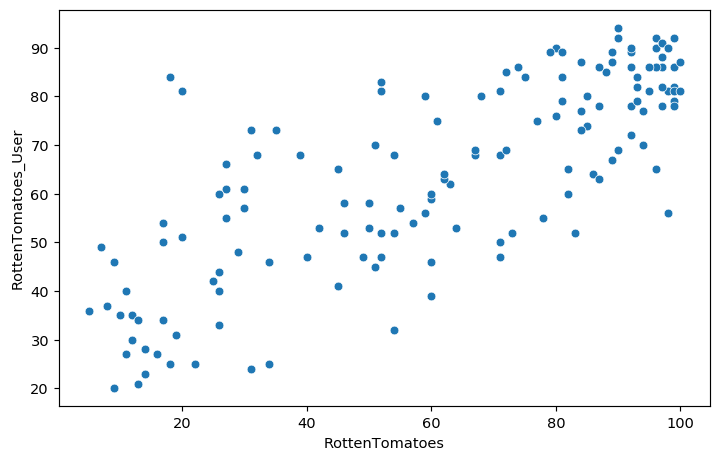

In [67]:
plt.figure(figsize=(8,5), dpi=105)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User');

Em geral, podemos ver que os críticos oficiais possuem um gosto semelhante aos usuários, com alguns poucos **outliers**.

Vamos também quantificar essa diferença ao comparar as notas dos críticos oficiais com os usuários do Rotten Tomatoes.

Criaremos então uma nova coluna baseado na diferença entre notas dos críticos e usuários.

Nosso cálculo será: **RottenTomatoes** - **RottenTomatoes_User**.

- Valores positivos altos indicarão que os críticos oficiais deram nota muito maior que os usuários.

- Valores negativos altos indicarão que os usuários deram nota muito maior que os críticos.

In [68]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [69]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Calcularemos agora a **Diferença Média Absoluta** entre notas dos oficiais e notas dos usuários.

In [70]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Plotaremos a distribuição das diferenças entre Pontuação de Críticos Oficiais e Pontuação de Usuário.

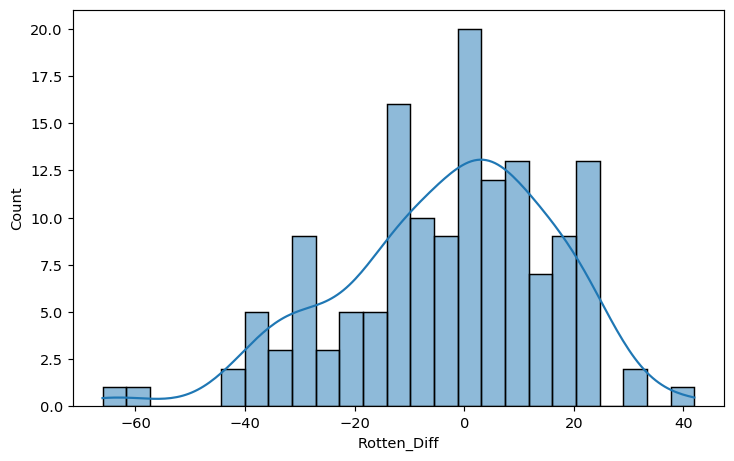

In [71]:
plt.figure(figsize=(8,5), dpi=105)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25);

E agora plotamos um gráfico da diferença absoluta entre críticos oficiais e usuários.

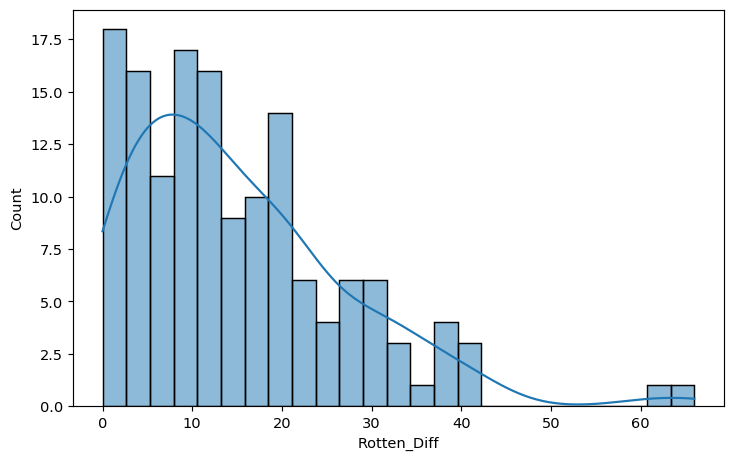

In [73]:
plt.figure(figsize=(8,5), dpi=105)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25);

Quais são os 5 filmes que os usuários avaliaram mais do que os críticios oficiais em média?

In [77]:
all_sites.nsmallest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


Quais são os 5 filmes que os críticos oficiais avaliaram mais do que os usuários em média?

In [78]:
all_sites.nlargest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


### Metacritic

Agora vamos analisar **MetaCritic**.

Apresentaremos um **scatterplot** da avaliação Metacritic vs Metacritic dos Usuários.

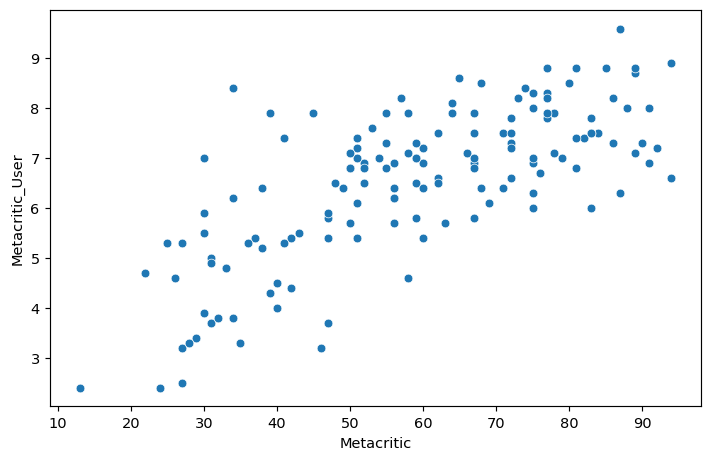

In [79]:
plt.figure(figsize=(8,5), dpi=105)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User');

Em geral os usuários tem uma avaliação semelhante aos críticos oficiais, praticamente sem **outliers**.

### IMDB vs Metacritic

Finalmente vamos explorar o IMDB.

Devemos estar atentos que ambos o Metacritic e IMDB reportam contagem de votos.

Vamos analisar os filmes mais populares.

Criaremos um **scatterplot** para a relação entre contagem de votos no MetaCritic versus Contagem de votos no IMDB.

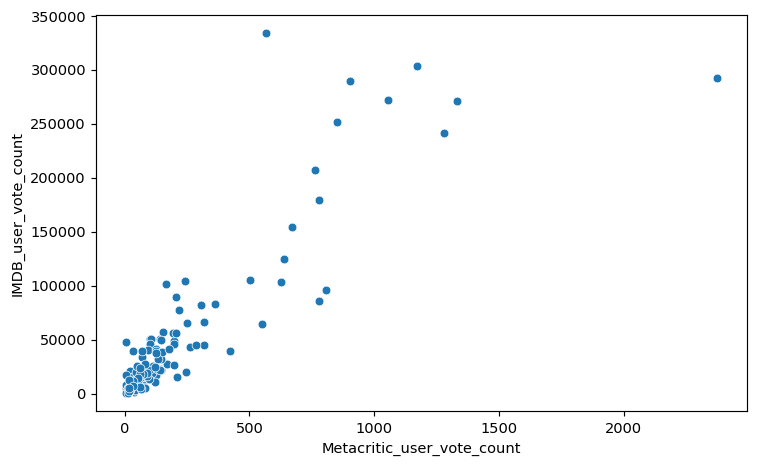

In [80]:
plt.figure(figsize=(8,5), dpi=105)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count');

Aparentemente temos dois **outliers**, um na extrema direita e um no topo.

Vejamos que pontos são esses.

Qual filme tem a maior contagem de votos de usuários no IMDB?

In [81]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


Qual filme tem maior contagem de votos de usuários no MetaCritic?

In [82]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Fandango vs Todos os Sites

Finalmente vamos começar a explorar se Fandango apresenta artificialmente avaliações maiores em relação a outros sites, para assim vender mais ingressos para filmes.

Devemos combinar a tabela de avaliações Fandango com a tabela de todos os sites.

Nem todo filme na tabela Fandango está presente na tabela de todos os sites, uma vez que alguns filmes Fandango possuem poucas ou até mesmo nenhuma avaliação. Nós queremos comparar apenas os filmes que estão presentes em ambos os **DataFrames**, por isso faremos um **inner merge** para unir ambos os **DataFrames** baseado na coluna **FILM**.

In [83]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')

In [86]:
df.head().T

,0,1,2,3,4
FILM,Fifty Shades of Grey (2015),Jurassic World (2015),American Sniper (2015),Furious 7 (2015),Inside Out (2015)
STARS,4,4.5,5,5,4.5
RATING,3.9,4.5,4.8,4.8,4.5
VOTES,34846,34390,34085,33538,15749
YEAR,2015,2015,2015,2015,2015
RottenTomatoes,25,71,72,81,98
RottenTomatoes_User,42,81,85,84,90
Metacritic,46,59,72,67,94
Metacritic_User,3.2,7,6.6,6.8,8.9
IMDB,4.2,7.3,7.4,7.4,8.6


Vejamos com quantos dados essa união resultou.

In [85]:
len(df)

145

Perceba que o Rotten Tomatoes, Metacritic e IMDB não usam a pontuação entre 0-5 estrelas como Fandango faz.

De forma a performar uma comparação justa, nós precisamos normalizar esses valores de maneira que eles fiquem entre 0-5 estrelas e o relacionamento entre as avaliações fique a mesma.

Criaremos colunas normalizadas para todas as avaliações para que elas fiquem todas no intervalo 0-5 estrelas apresentando no Fandango.

In [87]:
df.describe().T['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [89]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)

In [90]:
df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)

In [91]:
df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)

Agora temos todas as avaliações normalizadas entre 0-5 estrelas.

In [92]:
df.head().T

,0,1,2,3,4
FILM,Fifty Shades of Grey (2015),Jurassic World (2015),American Sniper (2015),Furious 7 (2015),Inside Out (2015)
STARS,4,4.5,5,5,4.5
RATING,3.9,4.5,4.8,4.8,4.5
VOTES,34846,34390,34085,33538,15749
YEAR,2015,2015,2015,2015,2015
RottenTomatoes,25,71,72,81,98
RottenTomatoes_User,42,81,85,84,90
Metacritic,46,59,72,67,94
Metacritic_User,3.2,7,6.6,6.8,8.9
IMDB,4.2,7.3,7.4,7.4,8.6


Criaremos um **norm_scores** DataFrame que contém apenas avaliações normalizadas. Incluímos ambos STARS e RATING da tabela original Fandango.

In [96]:
norm_scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [97]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


E agora é o momento da verdade.

Será que Fandango apresenta avaliações anormais?

Criaremos um gráfico comparando as distribuições das avaliações normalizadas em todos os sites.

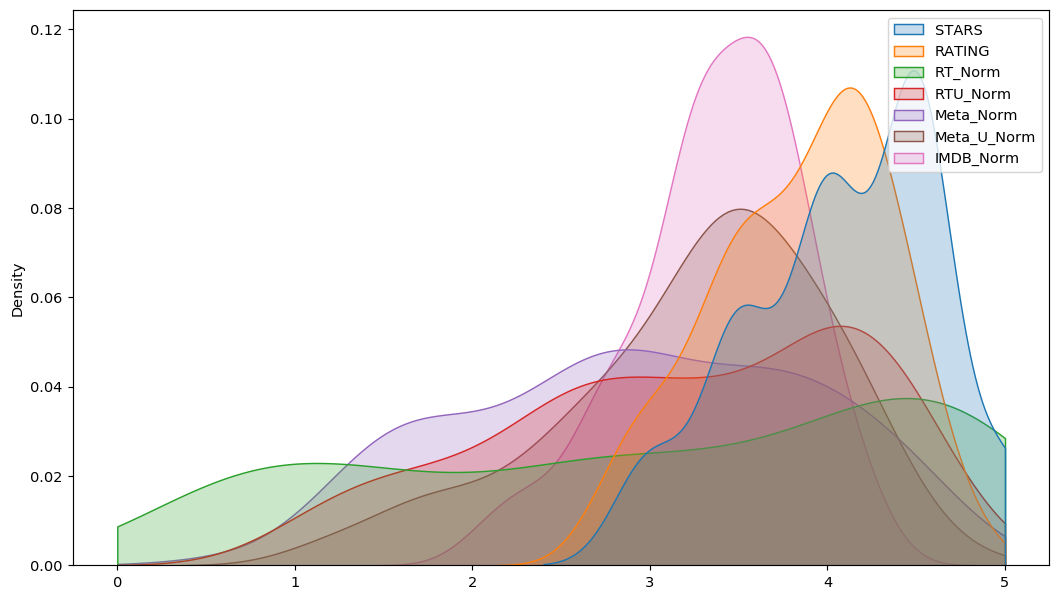

In [109]:
plt.figure(figsize=(12,7), dpi=105)
sns.kdeplot(data=norm_scores, clip=[0,5], shade=True);

E agora vamos comparar as avaliações dos críticos oficiais do Rotten Tomatoes contra as STARS apresentadas pelo Fandango.

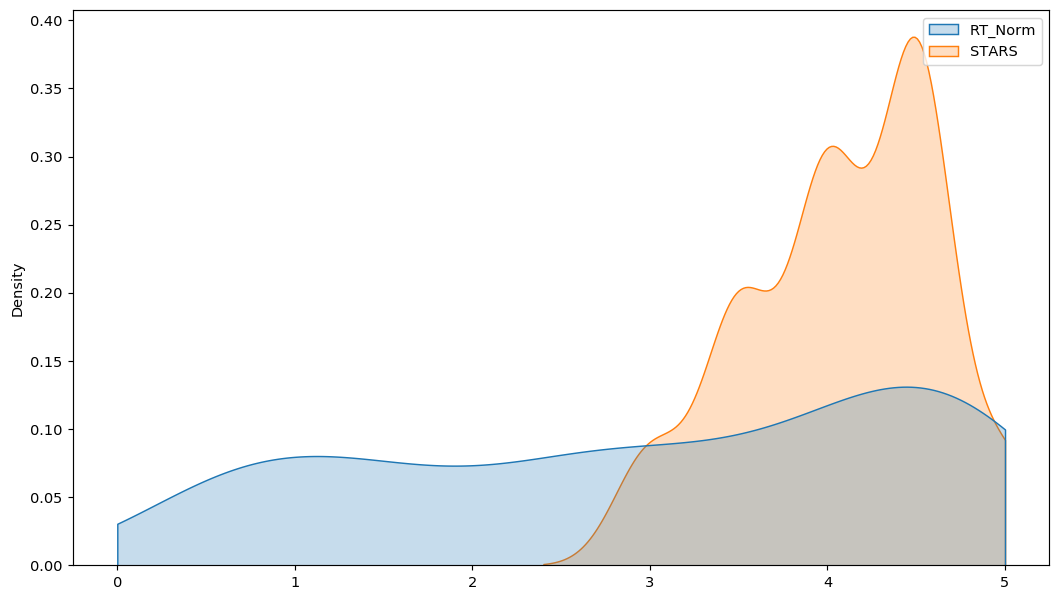

In [110]:
plt.figure(figsize=(12,7), dpi=105)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']], clip=[0,5], shade=True);

Como podemos ver, há uma grande discrepância. A maioria dos filmes Fandango são avaliados como bons.

Agora apresentaremos um **histplot** comparando todas as avaliações normalizadas.

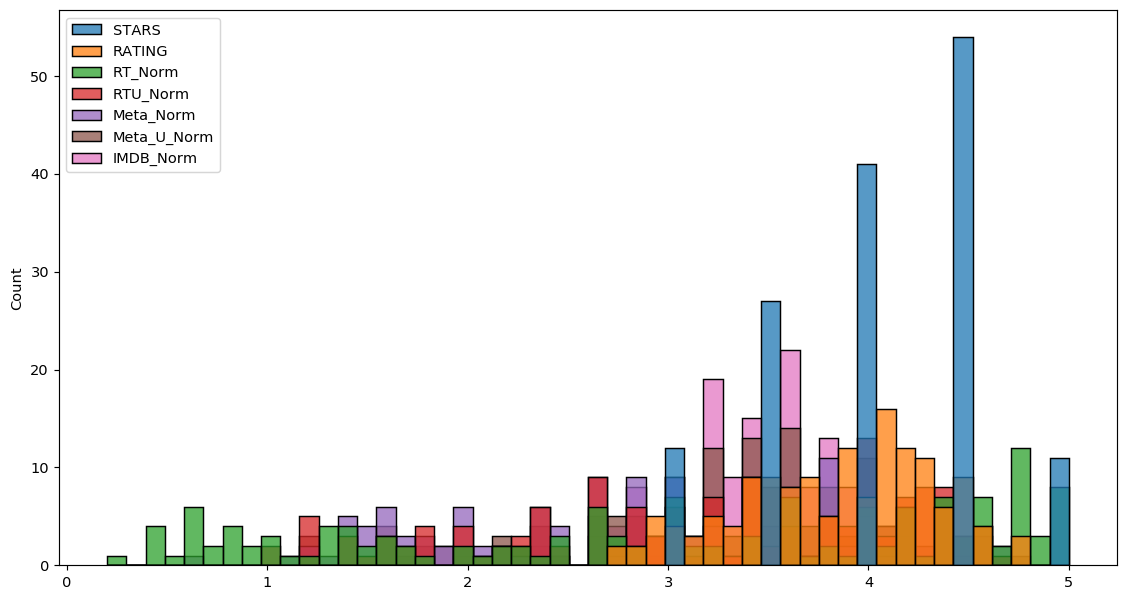

In [113]:
plt.figure(figsize=(13,7), dpi=105)
sns.histplot(data=norm_scores, bins=50);

Criaremos também um **clustermap** de todas as avaliações normalizadas.

Perceba a diferença em avaliações, filmes bem avaliados devem ser agrupados juntos, enquanto que filmes mal avaliados devem ser agrupados juntos.

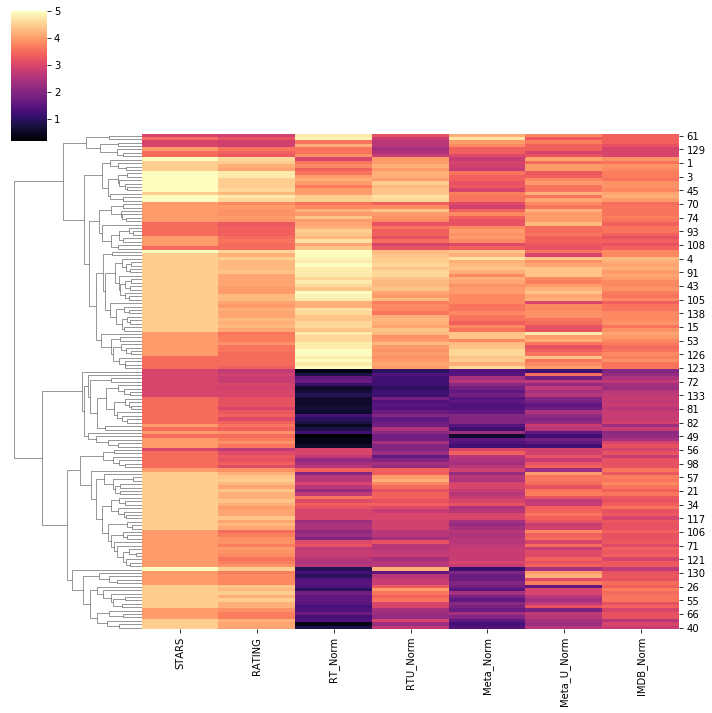

In [114]:
sns.clustermap(norm_scores, cmap='magma', col_cluster=False);

Podemos perceber que as críticas mais severas são do **Rotten Tomatoes**.

Enquanto que, Fandango, possui as melhores críticas, avaliando bem a maioria dos filmes.

Claramente Fandango está avaliando os filmes muito acima dos outros sites. 

Vamos examinar os piores 10 filmes. Baseado na avaliação dos críticos oficiais de Rotten Tomatoes, quais são os 10 piores avaliados filmes?

Qual é a pontuação normalizada em todas as plataformas para esses filmes?

In [115]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [116]:
norm_films = df[['FILM','STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_films.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


Piores 10 filmes para as avaliações de críticos oficiais de Rotten Tomatoes.

In [117]:
norm_films.nsmallest(10,'RT_Norm')

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


In [118]:
worst_10 = norm_films.nsmallest(10,'RT_Norm')

E então plotamos o gráfico.

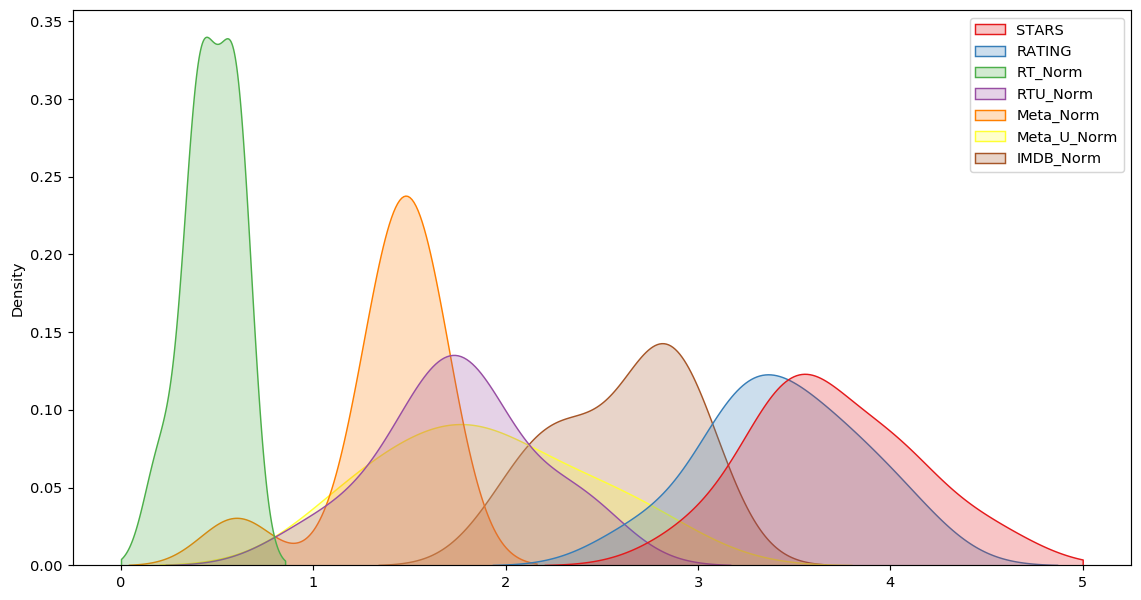

In [123]:
plt.figure(figsize=(13,7), dpi=105)
sns.kdeplot(data=worst_10, clip=[0,5], shade=True, palette='Set1');

Veja que até mesmo para os piores avaliados filmes, Fandango ainda sim os avalia bem.

De fato parece ser tudo manipulado.